In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
results = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/resampling/outputs/grid_searches/model_fine_tuning.csv', index_col=0)

In [7]:
for params, df in results.groupby(['param_max_depth', 'param_min_samples_leaf']):
    print(params)
    display(df[['mean_test_score', 'std_test_score']].mean())

(4, 1)


mean_test_score    0.254892
std_test_score     0.012338
dtype: float64

(4, 5)


mean_test_score    0.254841
std_test_score     0.012352
dtype: float64

(4, 10)


mean_test_score    0.254752
std_test_score     0.012331
dtype: float64

(50, 1)


mean_test_score    0.721762
std_test_score     0.015164
dtype: float64

(50, 5)


mean_test_score    0.680201
std_test_score     0.015701
dtype: float64

(50, 10)


mean_test_score    0.629612
std_test_score     0.015805
dtype: float64

(100, 1)


mean_test_score    0.721762
std_test_score     0.015164
dtype: float64

(100, 5)


mean_test_score    0.680201
std_test_score     0.015701
dtype: float64

(100, 10)


mean_test_score    0.629612
std_test_score     0.015805
dtype: float64

---

In [ ]:
#### THE FINAL CHOICE IS: max_depth': 50, 'min_samples_leaf': 1

rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_train_val.csv')

regression_forest = dict()

for rs in rss:
    regression_forest[rs] = RandomForestRegressor(max_depth=50,
                                          min_samples_leaf=1,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    regression_forest[rs].fit(X_train, y_train.iloc[:, 0])

/nfs/home/genovese/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/nfs/home/genovese/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/nfs/home/genovese/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target//resampling/src/trained_models/final_model.pkl', 'wb') as f:
    pickle.dump(regression_forest, f)

# with open('/nfs/home/genovese/thesis-wildfire-genovese/resampling/src/trained_models/final_model.pkl', 'rb') as f:
#     model = pickle.load(f)

In [32]:
transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = regression_forest[rs].predict(X_train).round(0)
    scores[rs] = (r2_score(y_train_pred, y_train), 
                  accuracy_score(pd.Series(y_train_pred).map(transform), pd.Series(y_train.iloc[:, 0]).map(transform)))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = regression_forest[rs].predict(X_test).round(0)
    scores[rs] = (r2_score(y_test_pred, y_test), 
                  accuracy_score(pd.Series(y_test_pred).map(transform), pd.Series(y_test.iloc[:, 0]).map(transform)))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

0.6548629154997967 0.14399493166802427
0.46454367401273994 0.14051282051282052


In [ ]:
# geodf = gpd.read_file('/nfs/home/genovese/thesis-wildfire-genovese/database/cache_resampled/dataset.geojson').set_index('fire_id')
# merged = geodf[['geometry']].merge(pd.Series(y_test_pred, index=X_test.index, name='predicted'), on='fire_id')
# # merged.to_file('/nfs/home/genovese/thesis-wildfire-genovese/outputs/results_for_qgis/pred_test_regression')
# merged2 = geodf[['geometry']].merge(pd.Series(y_train_pred, index=X_train.index, name='predicted'), on='fire_id')
# # merged2.to_file('/nfs/home/genovese/thesis-wildfire-genovese/outputs/results_for_qgis/pred_train_regression')

# y_tot = pd.concat([merged, merged2])
# y_tot.to_file('/nfs/home/genovese/thesis-wildfire-genovese/resampling/outputs/results_for_qgis/pred_tot_regression')

---

In [29]:
#### THE FINAL CHOICE IS: max_depth': 50, 'min_samples_leaf': 1

rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_train_val.csv')

classification_forest = dict()

for rs in rss:
    classification_forest[rs] = RandomForestClassifier(max_depth=50,
                                          min_samples_leaf=1,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    classification_forest[rs].fit(X_train, y_train.iloc[:, 0].map(transform))

with open('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/resampling/src/trained_models/final_classification_model.pkl', 'wb') as f:
    pickle.dump(classification_forest, f)

In [43]:
transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = classification_forest[rs].predict(X_train).round(0)
    scores[rs] = (r2_score(y_train_pred, y_train), 
                  accuracy_score(pd.Series(y_train_pred), pd.Series(y_train.iloc[:, 0]).map(transform)))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = classification_forest[rs].predict(X_test).round(0)
    scores[rs] = (r2_score(y_test_pred, y_test), 
                  accuracy_score(pd.Series(y_test_pred), pd.Series(y_test.iloc[:, 0]).map(transform)))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

-2.044850756553432 0.9995776390020213
-1.9368361122434443 0.4324786324786325


---

In [2]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/resampling/src/trained_models/final_classification_model.pkl', 'rb') as f:
    classification_forest = pickle.load(f)

with open('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/resampling/src/trained_models/final_model.pkl', 'rb') as f:
    regression_forest = pickle.load(f)

In [3]:
X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_train_val.csv')
X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/rekriging_target/database/model_input/y_test.csv')

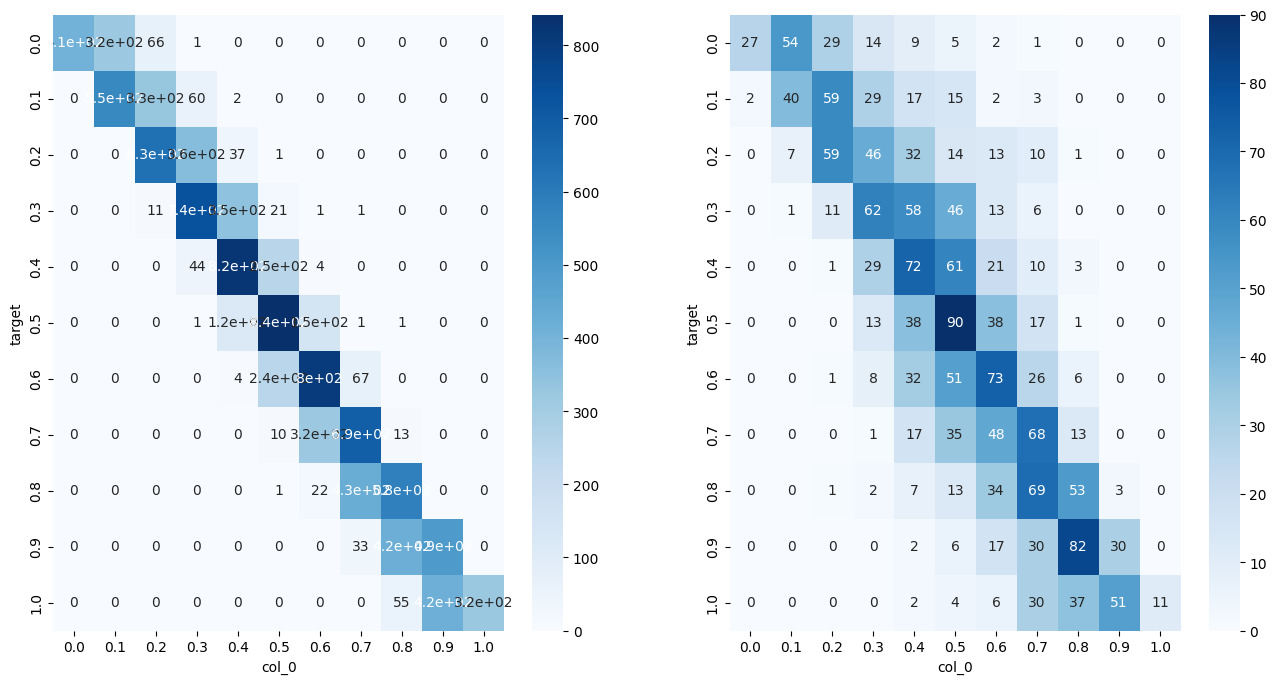

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        regression_forest[516].predict(X_train).round(1)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        regression_forest[516].predict(X_test).round(1)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()

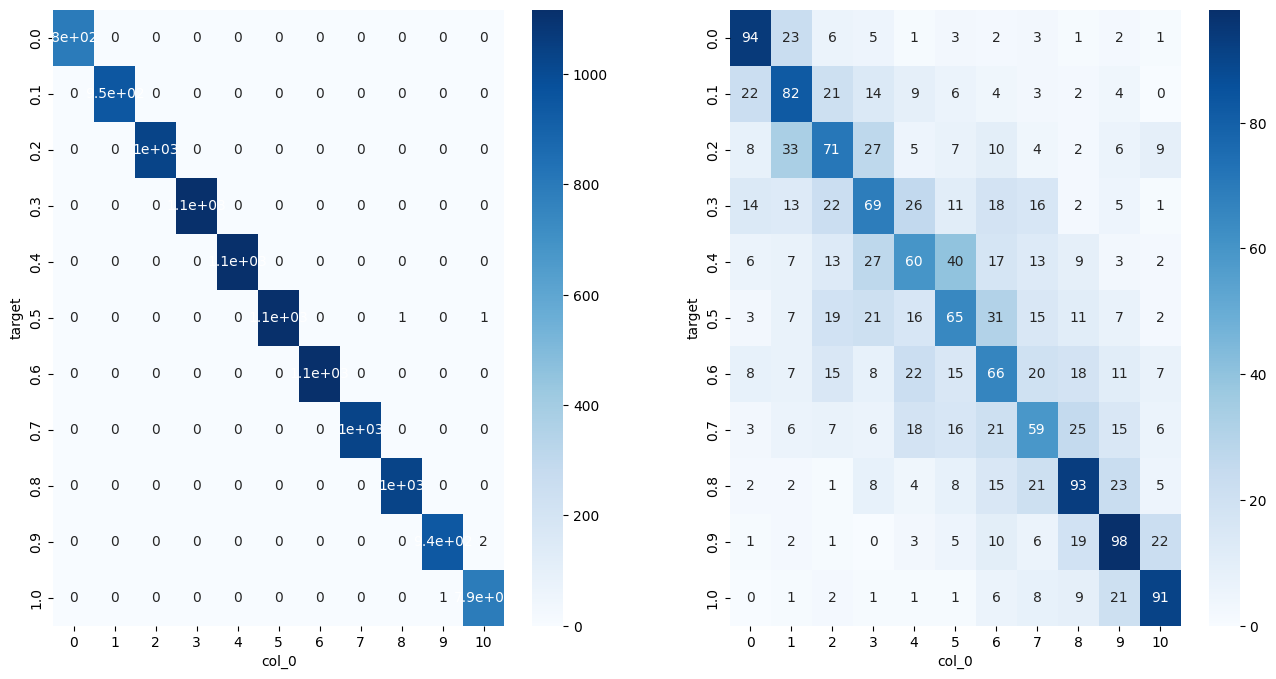

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        classification_forest[516].predict(X_train)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        classification_forest[516].predict(X_test)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()